## README
### Directory Structure


.

├── RouvalisAndreas_Report.pdf

└── RouvalisAndreas_SoftwareProject.ipynb




> Libraries 

> Loading data
>> Data exploration 

> Preprocessing 

> Implementation with Gensim and visualization



> Implementation of LDA from scratch
>> Visualization of results 




# Versions
Python: 3.11.3

nltk: 3.8.1

torch: 2.1.0

pandas: 1.5.3

spacy: 3.7.2

gensim: 4.3.2

pyLDAvis: 3.4.1

matplotlib: 3.8.0

seaborn: 0.13.2

wordcloud: 1.9.3

## Runtime 
It takes approximately 3 minutes to run the Gensim LDA models. 
It takes approximately 12 hours to run my lDA implemetation. 


## Instructions

Before running the file, it is necessary to download the corpus (LOCO.json, https://osf.io/qfjc4) and set the path. 

# Libraries

In [1]:
#libaries for handling data
import json
import torch
import pandas as pd
from collections import defaultdict, Counter


#Libraries for preprocessing
import spacy
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re


#Libaries for implemetation of LDA
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel, LdaMulticore




# Libraries for plotting
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud




import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data

In [2]:
class Reader:
    """
    A class to read and process the dataset.

    """

    def __init__(self, path, seeds):

        """
        Initializes the Reader class with the provided path and seeds.

        Args:
            path (str): The path to the dataset file.
            seeds (str): A seed (topic) to filter the dataset.
        """

        self.path = path
        self.seeds = seeds
        self.documents = self.load_dataset()
        self.conspiracy, self.mainstream = self.create_corpora()

    def load_dataset(self):

        """
        Loads the dataset from the specified path.

        Returns:
            list: The loaded dataset.
        """

        with open(self.path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        return data 

    def create_corpora(self):
        """
        Creates separate corpora for conspiracy and mainstream documents based on the provided seeds.

        Returns:
            tuple: A tuple containing two lists - conspiracy and mainstream corpora.
            conspiracy (list): A list containing conspiracy theory documents.
            mainstream (list): A list containing mainstream (non-conspiracy theory) document.
        """ 
        conspiracy = []
        mainstream = []     
        for dictionary in self.documents:
                doc_seeds= dictionary['seeds'].split(";")
                doc_seeds= [seed.strip() for seed in doc_seeds]
                for doc_seed in doc_seeds:
                    if doc_seed == self.seeds and dictionary['subcorpus'] == 'conspiracy':
                        conspiracy.append(dictionary['txt'])
                        break  # Break the loop after finding a match to avoid duplicates

                    if doc_seed in self.seeds and dictionary['subcorpus'] == 'mainstream':
                        mainstream.append(dictionary['txt'])
                        break  # Break the loop after finding a match to avoid duplicates

        return conspiracy, mainstream



In [3]:

seed = '5g' # Seed used for filtering the dataset.
path = 'LOCO.json' #Path to the dataset file.
corpus = Reader(path, seed) # Object instanciation of the Reader class


## Data exploration

In [4]:
for field in corpus.documents[0]: #Explore the information included in the dataset
    print(field)

doc_id
URL
website
seeds
date
subcorpus
title
txt
txt_nwords
txt_nsentences
txt_nparagraphs
topic_k100
topic_k200
topic_k300
mention_conspiracy
conspiracy_representative
cosine_similarity
FB_shares
FB_comments
FB_reactions


In [5]:
set_of_seeds = set()
for dictionary in corpus.documents:
        seeds= dictionary['seeds'].split(";")
        for seed in seeds:
                set_of_seeds.add(seed.strip())


In [6]:
#explore the dataset: Conspiracies included
set_of_seeds
        

{'5g',
 'aids',
 'alien',
 'barack.obama',
 'big.foot',
 'big.pharma',
 'bill.gates',
 'cancer',
 'chemtrails',
 'cia.cocaine',
 'climate.change',
 'coronavirus',
 'covid.19',
 'drug.companies',
 'ebola',
 'elvis.death',
 'elvis.presley',
 'flat.earth',
 'fluoride.water',
 'george.bush',
 'george.soros',
 'global.warming',
 'gmo',
 'illuminati',
 'jfk.assassination',
 'jonestown.suicide',
 'mh370',
 'michael.jackson.death',
 'mind.control',
 'moon.landing',
 'new.world.order',
 'nwo',
 'osama.bin.laden',
 'paul.mccartney.death',
 'pharmaceutical.industry',
 'pizzagate',
 'planned.parenthood',
 'population.control',
 'princess.diana.death',
 'reptilian',
 'saddam.hussein',
 'sandy.hook',
 'september.11.attack',
 'vaccine',
 'vaccine.autism',
 'vaccine.covid',
 'zika.virus'}

In [7]:
print(f'The conspiracy corpus consists of {len(corpus.conspiracy)} documents.')
print(f'The mainstream corpus consists of {len(corpus.mainstream)} documents.')


The conspiracy corpus consists of 702 documents.
The mainstream corpus consists of 1664 documents.


In [8]:
#Example of a conspiracy theory document
print(corpus.conspiracy[5])

As the old saying goes, give us an inch and inevitably we’ll want a mile. And certainly, this sentiment is true with technology.

Who doesn’t want faster, bigger (or smaller), more efficient? Take wireless mobile telecommunications. Our current broadband cellular network platform, 4G (or fourth generation), allows us to transmit data faster than 3G and everything that preceded. We can access information faster now than ever before in history. What more could we want? Oh, yes, transmission speeds powerful enough to accommodate the (rather horrifying) so-called Internet of Things. Which brings us to 5G.

Until now, mobile broadband networks have been designed to meet the needs of people. But 5G has been created with machines’ needs in mind, offering low-latency, high-efficiency data transfer. It achieves this by breaking data down into smaller packages, allowing for faster transmission times. Whereas 4G has a fifty-millisecond delay, 5G data transfer will offer a mere one-millisecond del

In [9]:
#Example of a mainstream document
print(corpus.mainstream[100])

“No Chinese company is an independent company,” Norbert Röttgen, a former government minister from Ms. Merkel’s party, said recently, adding that Huawei’s involvement was “an imminent question of national security.”

Yet one German telecommunication company, Telefonica Deutschland, has announced that it intends to contract Huawei for its 5G development.

European Union rules make it difficult to target individual companies for political reasons. The bloc could impose stringent standards of conduct and openness for 5G contractors that could be used to restrict Huawei but, as yet, has simply let each member country to decide how to proceed.

Distrust toward the Trump administration is also a significant factor, as European policymakers worry that American sanctions on Huawei are simply a bargaining chip in the United States’ broader trade war with China and might be reversed.

“There is a fear that if you take what potentially are quite expensive decisions with regards to 5G because the 

# Preprocessing 

In [10]:
class Preprocessor:

    """
    A class for preprocessing documents.

    Attributes:
        documents (list): List of documents to be preprocessed.
    """

    def __init__(self, documents):
        self.documents = documents

        # Preprocessing steps
        self.remove_new_line()
        self.lowercase()
        self.remove_punctuation()
        self.tokenize()  
        self.remove_small_words()
        self.remove_long_sequences()  
        self.bigram_model, self.trigram_model = self.build_ngram_models()
        self.create_bigrams()   
        self.create_trigrams()
        self.lemmatize()
        self.remove_stop_words() 
    
        self.word_document_frequency = self.calculate_per_document_frequency()
        self.set_of_words = self.create_set_of_words()
        self.document_occurance = self.calculate_document_occurance()




    def remove_new_line(self): #Removes new line characters from documents
        self.documents = [re.sub('\s+', ' ', doc) for doc in self.documents]
    

    def lowercase(self): #lowercase documents
        self.documents = [doc.lower() for doc in self.documents]




    
    def remove_punctuation(self): #removes punctuation from documents
        self.documents = [text.translate(str.maketrans(' ', ' ', string.punctuation))  for text in self.documents]




    def tokenize(self): #tokenizes documents
        self.documents = [doc.split() for doc in self.documents]




    
    def remove_small_words(self): #removes small words from documents
       self.documents= [[token for token in text if len(token)> 3] for text in self.documents]



    
    def remove_long_sequences(self): #remove long sequences from documents (e.g. links to websites)
       self.documents = [[token for token in text if len(token)< 15] for text in self.documents]



    
    def remove_stop_words(self): #removes stop words from documents
        stop_words = set(stopwords.words('english'))
        stop_words.update(['many', 'people', '’', 'time', 'city', 'year', 'good','thing', 'event', 'medium', 'part', 'video', 'earth', 'government', 'country', 'state', 'school', 
        'effect', 'network', 'technology', 'security', 'level', 'equipment', 'service', 'system'])
        self.documents = [[word for word in doc if word not in stop_words] for doc in self.documents]



    
    def build_ngram_models(self): 
        """
        Builds bigram and trigram models.

        Returns:
            tuple: A tuple containing bigram and trigram models.
        """
            
        bigram = gensim.models.Phrases(self.documents, min_count=5, threshold=50) 
        bigram_mod = gensim.models.phrases.Phraser(bigram)

        trigram = gensim.models.Phrases(bigram[self.documents], threshold= 10)
        trigram_mod = gensim.models.phrases.Phraser(trigram)

        return bigram_mod, trigram_mod
    


    def create_bigrams(self):#Creates bigrams from documents.
        self.documents= [self.bigram_model[doc] for doc in self.documents]




    def create_trigrams(self): #Creates trigrams from documents.
        self.documents= [self.trigram_model[self.bigram_model[doc]] for doc in self.documents]


    
    
    def lemmatize(self, pos_filter=['NOUN']): 

        """
        Lemmatizes documents.

        Args:
            pos_filter (list): List of parts of speech to filter for lemmatization.
        """
        
        nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

        docs_out = []
        for document in self.documents:
            doc = nlp(" ".join(document)) 
            docs_out.append([token.lemma_ for token in doc if token.pos_ in pos_filter])

        self.documents = docs_out


    def calculate_per_document_frequency(self): 
        """
        Calculates word frequency per document.

        Returns:
            dict: A dictionary containing word frequencies per document.
        """
        frequency_dict= defaultdict(int)
        for idx, document in enumerate(self.documents):
                frequency_dict[f'Document {idx}']= Counter(document)  

        return frequency_dict
    



    def create_set_of_words(self): #Creates a set of unique words
        return set(word for document in self.documents for word in document)
    


    def calculate_document_occurance(self): 

        """
        Calculates document occurrence of each word.

        Returns:
            defaultdict: A dictionary containing the document occurrence of each word.
        """
        doc_occur = defaultdict(int)
        for word in self.set_of_words:
            for document in self.word_document_frequency:
                if self.word_document_frequency[document][word]:
                    doc_occur[word] += 1
        return doc_occur
    

    

    def filter_extremes(self, lower_threshold, upper_threshold):
        """
        Filters words based on their document occurrence.

        Args:
            lower_threshold (int): Lower threshold for document occurrence.
            upper_threshold (int): Upper threshold for document occurrence.
        """

        set_of_extremes = set()
        for word in self.set_of_words:
            if lower_threshold >= self.document_occurance[word] or self.document_occurance[word] >= upper_threshold:
                set_of_extremes.add(word)

        self.documents = [[word for word in document if word not in set_of_extremes] for document  in self.documents]

In [24]:
#Preproccess the two corpora.
clean_conspiracy = Preprocessor(corpus.conspiracy)  
clean_mainstream = Preprocessor(corpus.mainstream)  


# Implementation with Gensim and visualization

In [25]:

#Create gensim dictionaries.
id2word_conspiracy = corpora.Dictionary(clean_conspiracy.documents)
id2word_mainstream = corpora.Dictionary(clean_mainstream.documents)


# Filter out extreme words.
id2word_conspiracy.filter_extremes(30,702)
id2word_mainstream.filter_extremes(35,1498)

#Convert documents to bag-of-words representations.
conspiracy_corpus = [id2word_conspiracy.doc2bow(doc) for doc in clean_conspiracy.documents]
mainstream_corpus = [id2word_mainstream.doc2bow(doc) for doc in clean_mainstream.documents]

In [26]:
#Print the number of unique words in the dictionaries.
print(f'The consipracy theory dictionary contains {len(id2word_conspiracy)} unique words.')
print(f'The mainstream dictionary contains {len(id2word_mainstream)} unique words.')

The consipracy theory dictionary contains 580 unique words.
The mainstream dictionary contains 866 unique words.


In [27]:
num_of_topics_conspiracy = 4
num_of_topics_mainstream= 3

In [34]:

#Create an LDA model for |the conspiracy corpus.
lda_model_conspiracy = gensim.models.LdaMulticore(
    corpus= conspiracy_corpus,
    id2word=id2word_conspiracy,
    num_topics=num_of_topics_conspiracy,  
    random_state=100,
    chunksize=1,
    passes=300,
    per_word_topics=True
)



In [35]:
#Print the top words for each of the  topics identified by the LDA model from the conspiracy corpus.
lda_model_conspiracy.print_topics(num_topics=num_of_topics_conspiracy, num_words=6)

[(0,
  '0.036*"radiation" + 0.026*"study" + 0.024*"exposure" + 0.021*"health" + 0.015*"research" + 0.015*"frequency"'),
 (1,
  '0.059*"virus" + 0.049*"vaccine" + 0.048*"coronavirus" + 0.044*"covid19" + 0.032*"disease" + 0.027*"child"'),
 (2,
  '0.045*"trump" + 0.025*"economy" + 0.024*"money" + 0.019*"market" + 0.019*"company" + 0.016*"world"'),
 (3,
  '0.020*"world" + 0.011*"control" + 0.010*"energy" + 0.010*"power" + 0.010*"humanity" + 0.009*"life"')]

In [36]:
#Visualize with pyLDAvis
pyLDAvis.enable_notebook()
vis_conspiracy= pyLDAvis.gensim.prepare(lda_model_conspiracy, conspiracy_corpus, id2word_conspiracy)

In [37]:
vis_conspiracy

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.115878 -0.149201       1        1  44.044398
0     -0.114721 -0.174836       2        1  30.455159
2      0.240686  0.156670       3        1  15.302711
1     -0.241843  0.167367       4        1  10.197732, topic_info=            Term        Freq       Total Category  logprob  loglift
78         virus  361.000000  361.000000  Default  30.0000  30.0000
35         trump  416.000000  416.000000  Default  29.0000  29.0000
232    radiation  656.000000  656.000000  Default  28.0000  28.0000
315      vaccine  304.000000  304.000000  Default  27.0000  27.0000
45   coronavirus  295.000000  295.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
161         cell   62.881620  266.785490   Topic4  -4.5820   0.8378
226   population   56.633115  232.932537   Topic4  -4.6866   0.8688
306    operation   52.475347  173.923003   Topic4  -4.7629   1.0847
243    scientist   52.470346  300.396805   Topic4  -4.7630   0.5381
248        study   53.057707  539.363975   Topic4  -4.7518  -0.0360

[231 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
124       1  0.952977               access
124       2  0.042167               access
80        1  0.996541               agenda
154       2  0.993728              antenna
560       2  0.991663               appeal
...     ...       ...                  ...
561       2  0.988914   wireless_radiation
317       2  0.996415  wireless_technology
123       1  0.754653                world
123       3  0.210501                world
123       4  0.034367                world

[329 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [19]:

# Create an LDA model for the mainstream corpus
lda_model_mainstream = gensim.models.LdaMulticore(
    corpus=mainstream_corpus,
    id2word=id2word_mainstream,
    num_topics=num_of_topics_mainstream,  
    random_state=100,
    chunksize=1,
    passes=300,
    per_word_topics=True
)


In [28]:
# Print the top words for each of the  topics identified by the LDA model from the mainstream corpus.
lda_model_mainstream.print_topics(num_topics= num_of_topics_mainstream, num_words=7)


[(0,
  '0.015*"health" + 0.014*"coronavirus" + 0.012*"theory" + 0.012*"exposure" + 0.012*"study" + 0.011*"covid19" + 0.011*"virus"'),
 (1,
  '0.024*"device" + 0.019*"datum" + 0.015*"user" + 0.012*"communication" + 0.011*"application" + 0.010*"phone" + 0.010*"speed"'),
 (2,
  '0.056*"company" + 0.016*"market" + 0.013*"plan" + 0.012*"decision" + 0.011*"tmobile" + 0.010*"infrastructure" + 0.010*"customer"')]

In [21]:
#Visualize with pyLDAvis
pyLDAvis.enable_notebook()
vis_mainstream= pyLDAvis.gensim.prepare(lda_model_mainstream, mainstream_corpus, id2word_mainstream)


In [22]:
vis_mainstream

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.097037  0.183452       1        1  39.734819
1     -0.134359 -0.164732       2        1  35.723173
0      0.231396 -0.018720       3        1  24.542008, topic_info=            Term         Freq        Total Category  logprob  loglift
4        company  2888.000000  2888.000000  Default  30.0000  30.0000
69        device  1183.000000  1183.000000  Default  29.0000  29.0000
160       health   508.000000   508.000000  Default  28.0000  28.0000
119  coronavirus   437.000000   437.000000  Default  27.0000  27.0000
192       market   917.000000   917.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
0         attack   186.989162   280.838400   Topic3  -5.1427   0.9981
213       amount   185.117080   279.492095   Topic3  -5.1527   0.9928
426   researcher   184.698311   280.629535   Topic3  -5.1550   0.9865
132         risk   221.310696   677.556107   Topic3  -4.9741   0.2859
141  information   211.875780   658.430226   Topic3  -5.0177   0.2709

[192 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
295       1  0.533897      access
295       2  0.464334      access
152       1  0.906406      agency
152       3  0.091556      agency
371       1  0.991444  allegation
...     ...       ...         ...
503       2  0.996702        wifi
174       3  0.991831       woman
112       1  0.590568       world
112       2  0.198865       world
112       3  0.210917       world

[250 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

# Implementation of LDA from scratch

In [ ]:
def assign_word_id(docs):
    """
    Assigns unique IDs to words in documents.

    Args:
        docs (list): List of documents.

    Returns:
        dict: A dictionary mapping words to their assigned IDs.
    """

    set_of_words = sorted(list(set([word for doc in docs for word in doc])))
    

    id_dictionary= {word: id for id,  word in enumerate(set_of_words)}
    
    return id_dictionary

In [ ]:

word2id_conspiracy = assign_word_id(clean_conspiracy.documents)
word2id_mainstream = assign_word_id(clean_mainstream.documents)

In [ ]:
#Create a list of words from the documents in each corpus.
ls_of_words_conspiracy = [word for doc in clean_conspiracy.documents for word in doc]
ls_of_words_mainstream = [word for doc in clean_mainstream.documents for word in doc]

In [ ]:
def calculate_frequency(ls):

    """
    Calculates the frequency of words in a list.

    Args:
        ls (list): List of words.

    Returns:
        defaultdict: A dictionary mapping words to their frequencies.
    """

    frequency_dict=defaultdict(int)

    for word in sorted(ls):
        frequency_dict[word] +=1
        
    return frequency_dict


In [ ]:
word_frequency_conspiracy = calculate_frequency(ls_of_words_conspiracy)
word_frequency_mainstream = calculate_frequency(ls_of_words_mainstream)

In [ ]:
def topic_word_calculate(docs,z, num_of_topics, id_dict):

    """
    Calculates the topic-word distribution.

    Args:
        docs (list): List of documents.
        z (torch.Tensor): Tensor of topic assignments for each word in each document.
        num_of_topics (int): Number of topics.
        id_dict (dict): Dictionary mapping words to their assigned IDs.

    Returns:
        torch.Tensor: Topic-word distribution tensor.
    """

    topic_word = torch.zeros((num_of_topics, len(id_dict)))
    for d, doc in enumerate(docs):
        for n, word in enumerate(doc):
            word_id= id_dict.get(word)
            
            
            topic_id = z[d][n]
            topic_word[topic_id][word_id] +=1
            
    return topic_word

In [ ]:
def collapsed_Gibbs(docs, id_dict, num_of_topics, passes, alpha, beta):

    """
    Performs collapsed Gibbs sampling for topic modeling.

    Args:
        docs (list): List of documents.
        id_dict (dict): Dictionary mapping word IDs to their corresponding words.
        num_of_topics (int): Number of topics.
        passes (int): Number of iterations.
        alpha (float): Parameter for the Dirichlet prior on document-topic distributions.
        beta (float): Parameter for the Dirichlet prior on topic-word distributions.

    Returns:
        torch.Tensor: Document-topic distribution tensor.
        torch.Tensor: Topic-word distribution tensor.
        torch.Tensor: Number of words assigned to each topic.
        torch.Tensor: Tensor containing topic assignments for each word in each document.
    """
    #Initialize topic assignments randomly
    max_len = max([len(d) for d in docs])
    z = torch.randint(0, num_of_topics, (len(docs), max_len))


    # Pad shorter documents
    for d, doc in enumerate(docs):
        for i in range(len(doc), max_len):
            z[d][i] = num_of_topics
            
    #Initialize counts for document-topic and topic-word distributions
    document_topic = torch.nn.functional.one_hot(z).sum(dim=1) 
    document_topic= document_topic[:,:num_of_topics]
    words_per_topic =  torch.sum(document_topic, dim=0)
    topic_word = topic_word_calculate(docs, z, num_of_topics, id_dict)
    

    #Perform collapsed Gibbs sampling
    for single_pass in range(passes):
        for d, doc in enumerate(docs):
            for w, word in enumerate(doc):
                word_id = id_dict.get(word)
                topic_id = z[d][w]

                #Decrement counts for current word assignment
                document_topic[d][topic_id] -=1
                topic_word[topic_id][word_id] -=1
                words_per_topic[topic_id] -=1


                # Calculate probabilities 
                p = torch.zeros(num_of_topics)
                for topic in range(num_of_topics):
                    p[topic]= ((topic_word[topic][word_id] +beta) * (document_topic[d][topic]+ alpha)) /(words_per_topic[topic] + beta * len(id_dict))
                

                # Sample a new topic assignment
                topic = torch.multinomial(p, 1, replacement=True).item() 
                z[d][w] = topic 
                
                #Update counts
                document_topic[d][topic] +=1
                topic_word[topic][word_id] +=1
                words_per_topic[topic] +=1

            return document_topic, topic_word, words_per_topic, z

In [ ]:

document_topic_conspiracy, topic_word_conspiracy, words_per_topic_conspiracy, z_conspiracy = collapsed_Gibbs(clean_conspiracy.documents,word2id_conspiracy, num_of_topics=num_of_topics_conspiracy, passes= 600, alpha= 1/num_of_topics_conspiracy, beta= 1/num_of_topics_conspiracy)

document_topic_mainstream, topic_word_mainstream, words_per_topic_mainstream, z_mainstream = collapsed_Gibbs(clean_mainstream.documents,word2id_mainstream, num_of_topics=num_of_topics_mainstream, passes=500,  alpha= 1/num_of_topics_mainstream, beta= 1/num_of_topics_mainstream)

# Visualization of results


In [2]:
class Visualizer:

    """
    A class to visualize topic modeling results.

    Attributes:
        topic_word (torch.Tensor): Topic-word distribution tensor.
        vocabulary (list): List of words in the vocabulary.
        topics (list): List of topics.
        document_topic (torch.Tensor): Document-topic distribution tensor.
        frequency_dict (dict): Dictionary containing word frequencies.
    """

    def __init__(self, topic_word,vocabulary, topics, document_topic, frequency_dict):

        """
        Initializes the Visualizer with topic modeling results.

        Args:
            topic_word (torch.Tensor): Topic-word distribution tensor.
            vocabulary (list): List of words in the vocabulary.
            topics (list): List of topics.
            document_topic (torch.Tensor): Document-topic distribution tensor.
            frequency_dict (dict): Dictionary containing word frequencies.
        """

        self.topic_word= topic_word
        self.vocabulary = vocabulary
        self.topics= topics
        self.document_topic = document_topic
        self.word_frequency = frequency_dict
    

        


    def generate_ldavis(self):

        """
        Generates visualizations using pyLDAvis.
        
        Returns:
            pyLDAvis PreparedData: PreparedData object for visualization.
        """

        pyLDAvis.enable_notebook()
        data4vis= pyLDAvis.prepare(doc_lengths = torch.sum(self.document_topic, dim=1), term_frequency=self.word_frequency, topic_term_dists= self.topic_word, 
                                   doc_topic_dists= self.document_topic, vocab= self.vocabulary, R=10)
        
        return data4vis
    

    
        
    def create_wordcloud(self): #Creates a word cloud for each topic.
        for topic in range(len(self.topics)):
            wordcloud = WordCloud(width=800, height=400,  max_words= 15, colormap= 'viridis',  contour_color = '#FFFFFF',  background_color = 'white').generate_from_frequencies(dict(zip(self.vocabulary, self.topic_word[topic].numpy())))
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud)
            plt.title(f'Topic {topic}' )
            plt.axis('off')
            plt.show()

    

        

In [ ]:
#Create a Visualizer object for the conspiracy corpus
topics_conspiracy=[f'Topic {i}' for i in range(num_of_topics_conspiracy)]
graphs_conspiracy = Visualizer(topic_word_conspiracy, list(word2id_conspiracy.keys()), topics_conspiracy, document_topic_conspiracy, word_frequency_conspiracy)
vis_conspiracy = graphs_conspiracy.generate_ldavis()


In [25]:
pyLDAvis.display(vis_conspiracy)


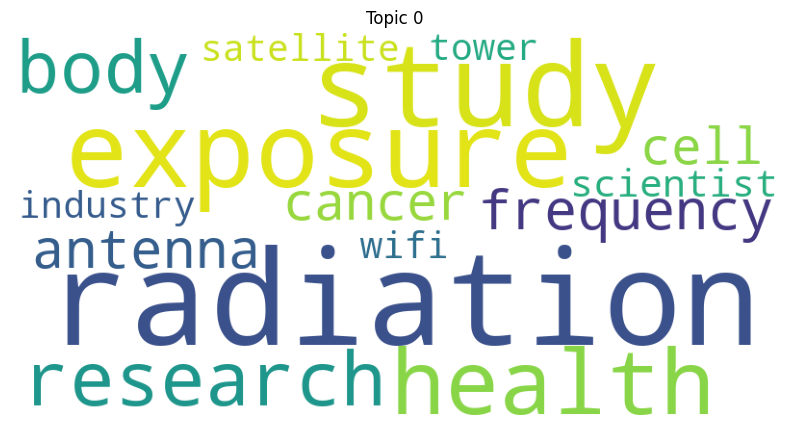

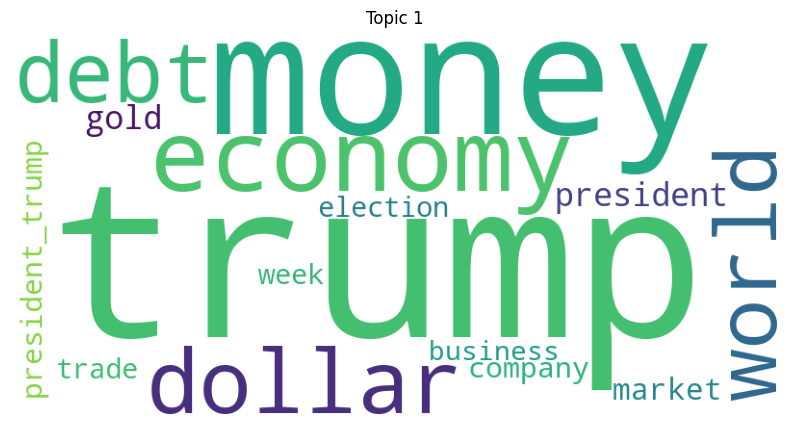

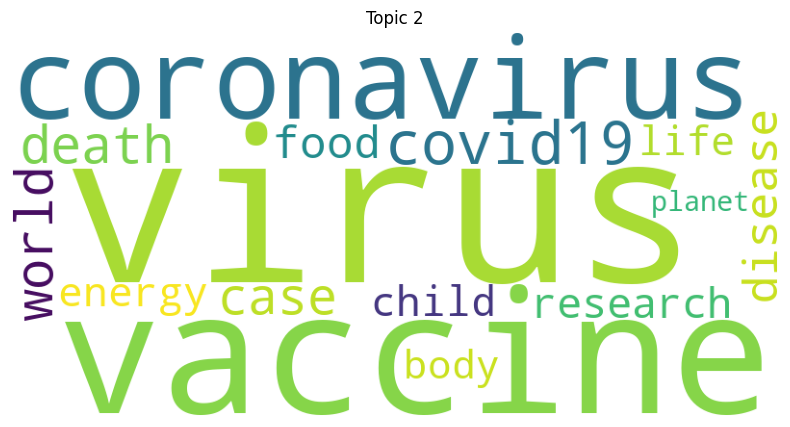

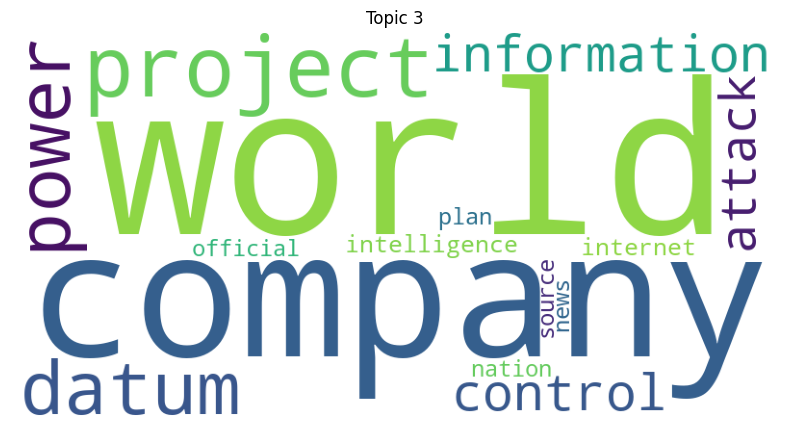

In [26]:
graphs_conspiracy.create_wordcloud()

In [ ]:
#Create a Visualizer object for the mainstream corpus
topics_mainstream=[f'Topic {i}' for i in range(num_of_topics_mainstream)]
graphs_mainstream= Visualizer(topic_word_mainstream, list(word2id_mainstream.keys()), topics_mainstream, document_topic_mainstream, word_frequency_mainstream)
vis_mainstream = graphs_mainstream.generate_ldavis()



In [ ]:
pyLDAvis.display(vis_mainstream)


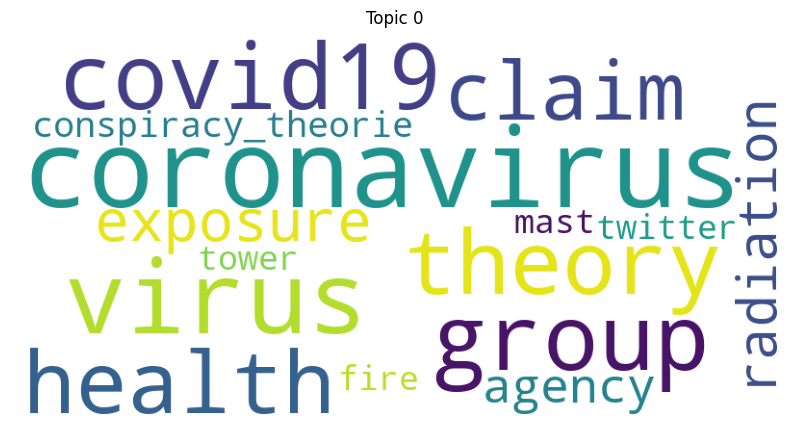

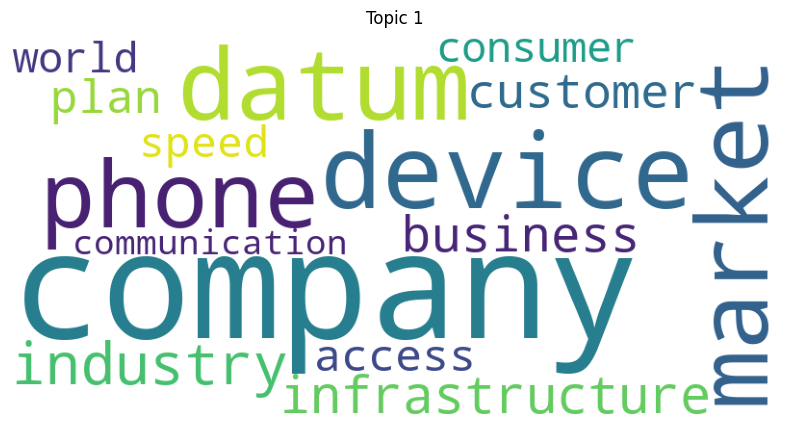

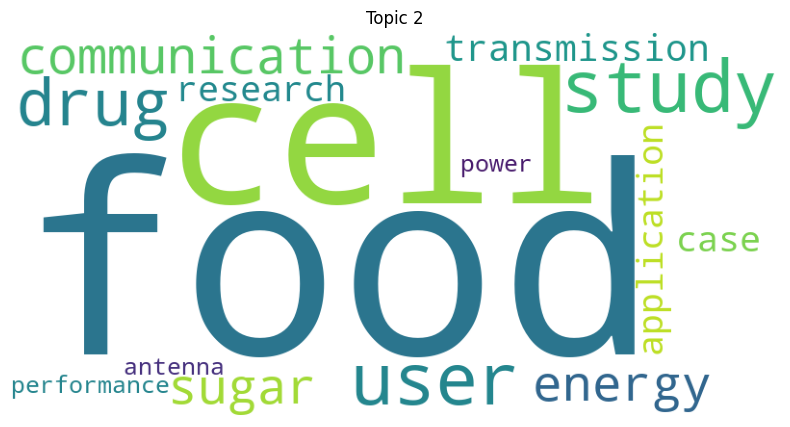

In [ ]:
graphs_mainstream.create_wordcloud()